In [22]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

In [23]:
config_file = "configs/experiment_results_synthetic.json"
with open(config_file) as json_file:
    results = json.load(json_file)

# experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage']
# experiments = ['softCBM', 'latentCBM', 'sequentialLeakage', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage']
# experiments = ['sequentialCBM', 'sequentialLatentCBM', 'sequentialLeakage', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage', 'sequentialLatentCBM', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
headers = ["Method", "Loss", "Label Accuracy", "Label Loss", "Concept Accuracy", "Concept Loss", "Latent Loss"]
headers = ["Method", "Label Accuracy", "Concept Accuracy", "Latent Loss"]
expr_results = []
for expr in experiments:
    expr_result = [expr]    
    expr_result.extend([float(results[expr]['results'].get(key)) for key in headers[1:]])
    expr_results.append(expr_result)
# expr_results = np.array(expr_results, dtype=float)

In [24]:
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Label Accuracy,Concept Accuracy,Latent Loss
0,baseNN,0.50490,0.480738,0.000000
1,softCBM,0.48030,0.810969,0.000000
2,latentCBM,0.51770,0.829647,0.000000
3,leakageLoss,0.48800,0.806991,0.001372
4,leakageDelay,0.48575,0.812756,0.001682
5,sequentialCBM,0.52745,0.846456,0.074843
6,sequentialLeakage,0.52840,0.844612,0.001039
7,sequentialLatentCBM,0.55595,0.845256,0.000000
8,hardCBM,0.51545,0.834978,0.000000
9,hardLatentCBM,0.50735,0.823828,0.000000


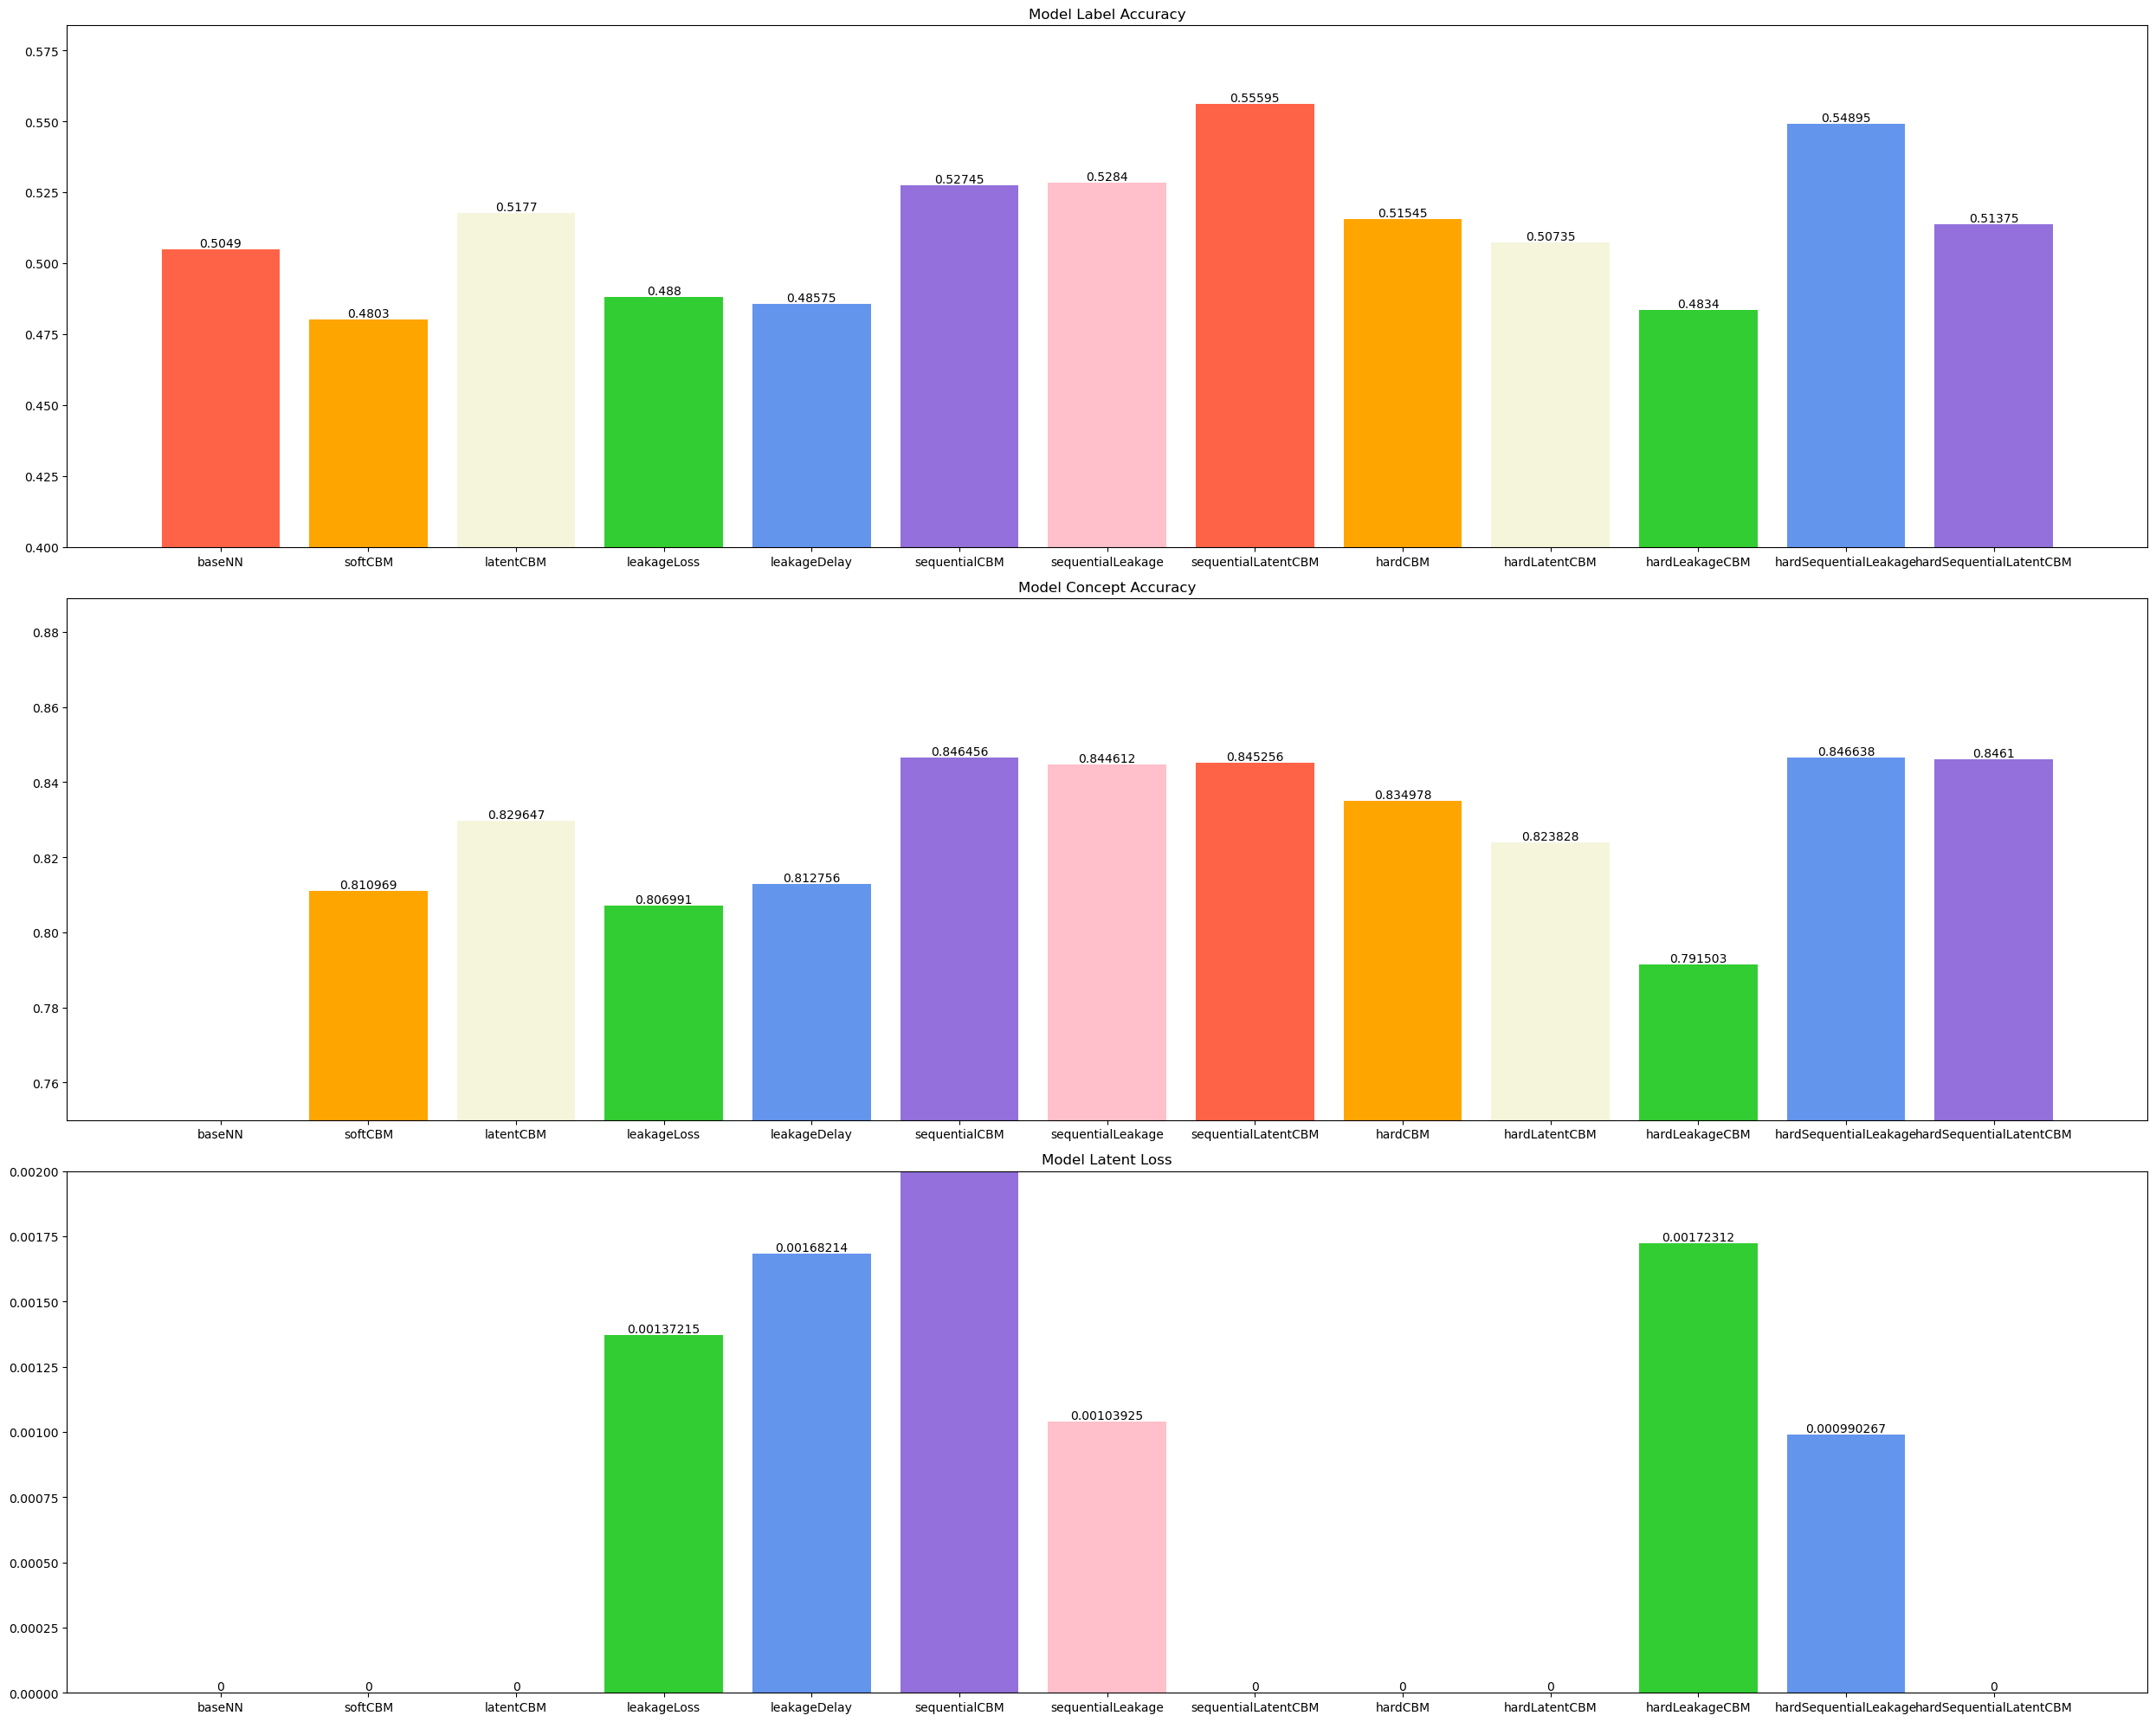

In [25]:
# plt.figure(figsize=(10,30))
fig, axs = plt.subplots(3, 1, figsize=(25, 20))
colors = ['tomato', 'orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink']
for i in range(1, len(headers)):
    bar = axs[(i-1)%3].bar(experiments, df[headers[i]], color=colors)
    axs[(i-1)%3].set_title(f"Model {headers[i]}")
    axs[(i-1)%3].bar_label(bar, label_type='edge')

axs[0].set_ylim(bottom=0.4)
axs[1].set_ylim(bottom=0.75)
axs[2].set_ylim(top=0.002)
plt.tight_layout()
plt.show()


In [26]:
experiments = ['softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage', 'sequentialLatentCBM', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
headers = ["Method", "Label Accuracy", "Intervention Label Accuracy"]
expr_results = []
for expr in experiments:
    expr_result = [expr]
    intervention_acc = list(results[expr]['results'].get("Intervention Label Accuracy"))
    intervention_acc.insert(0, results[expr]['results'].get("Label Accuracy"))
    expr_result.extend(intervention_acc)
    expr_results.append(expr_result)
headers = ["Method", "Default Accuracy", "4 Interventions", "8 Interventions", "12 Interventions", "16 Interventions"]
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Default Accuracy,4 Interventions,8 Interventions,12 Interventions,16 Interventions
0,softCBM,0.48030,0.4609,0.4630,0.4645,0.4658
1,latentCBM,0.51770,0.5670,0.5747,0.5750,0.5751
2,leakageLoss,0.48800,0.5093,0.5204,0.5243,0.5253
3,leakageDelay,0.48575,0.4896,0.4965,0.4991,0.4998
4,sequentialCBM,0.52745,0.5860,0.5888,0.5893,0.5893
5,sequentialLeakage,0.52840,0.5814,0.5829,0.5827,0.5826
6,sequentialLatentCBM,0.55595,0.6043,0.6093,0.6092,0.6094
7,hardCBM,0.51545,0.5606,0.5607,0.5607,0.5607
8,hardLatentCBM,0.50735,0.5706,0.5712,0.5712,0.5712
9,hardLeakageCBM,0.48340,0.5420,0.5429,0.5429,0.5429


In [27]:
print(expr_results)

[['softCBM', 0.48029999976158144, 0.4609, 0.463, 0.4645, 0.4658], ['latentCBM', 0.5176999998092652, 0.567, 0.5747, 0.575, 0.5751], ['leakageLoss', 0.488, 0.5093, 0.5204, 0.5243, 0.5253], ['leakageDelay', 0.4857499994277954, 0.4896, 0.4965, 0.4991, 0.4998], ['sequentialCBM', 0.5274500000953675, 0.586, 0.5888, 0.5893, 0.5893], ['sequentialLeakage', 0.5284000003814697, 0.5814, 0.5829, 0.5827, 0.5826], ['sequentialLatentCBM', 0.5559500000953674, 0.6043, 0.6093, 0.6092, 0.6094], ['hardCBM', 0.5154500008583068, 0.5606, 0.5607, 0.5607, 0.5607], ['hardLatentCBM', 0.5073500004768372, 0.5706, 0.5712, 0.5712, 0.5712], ['hardLeakageCBM', 0.48339999990463256, 0.542, 0.5429, 0.5429, 0.5429], ['hardSequentialLeakage', 0.5489500007629394, 0.6042, 0.6042, 0.6042, 0.6042], ['hardSequentialLatentCBM', 0.5137500001907349, 0.5542, 0.5541, 0.5541, 0.5541]]


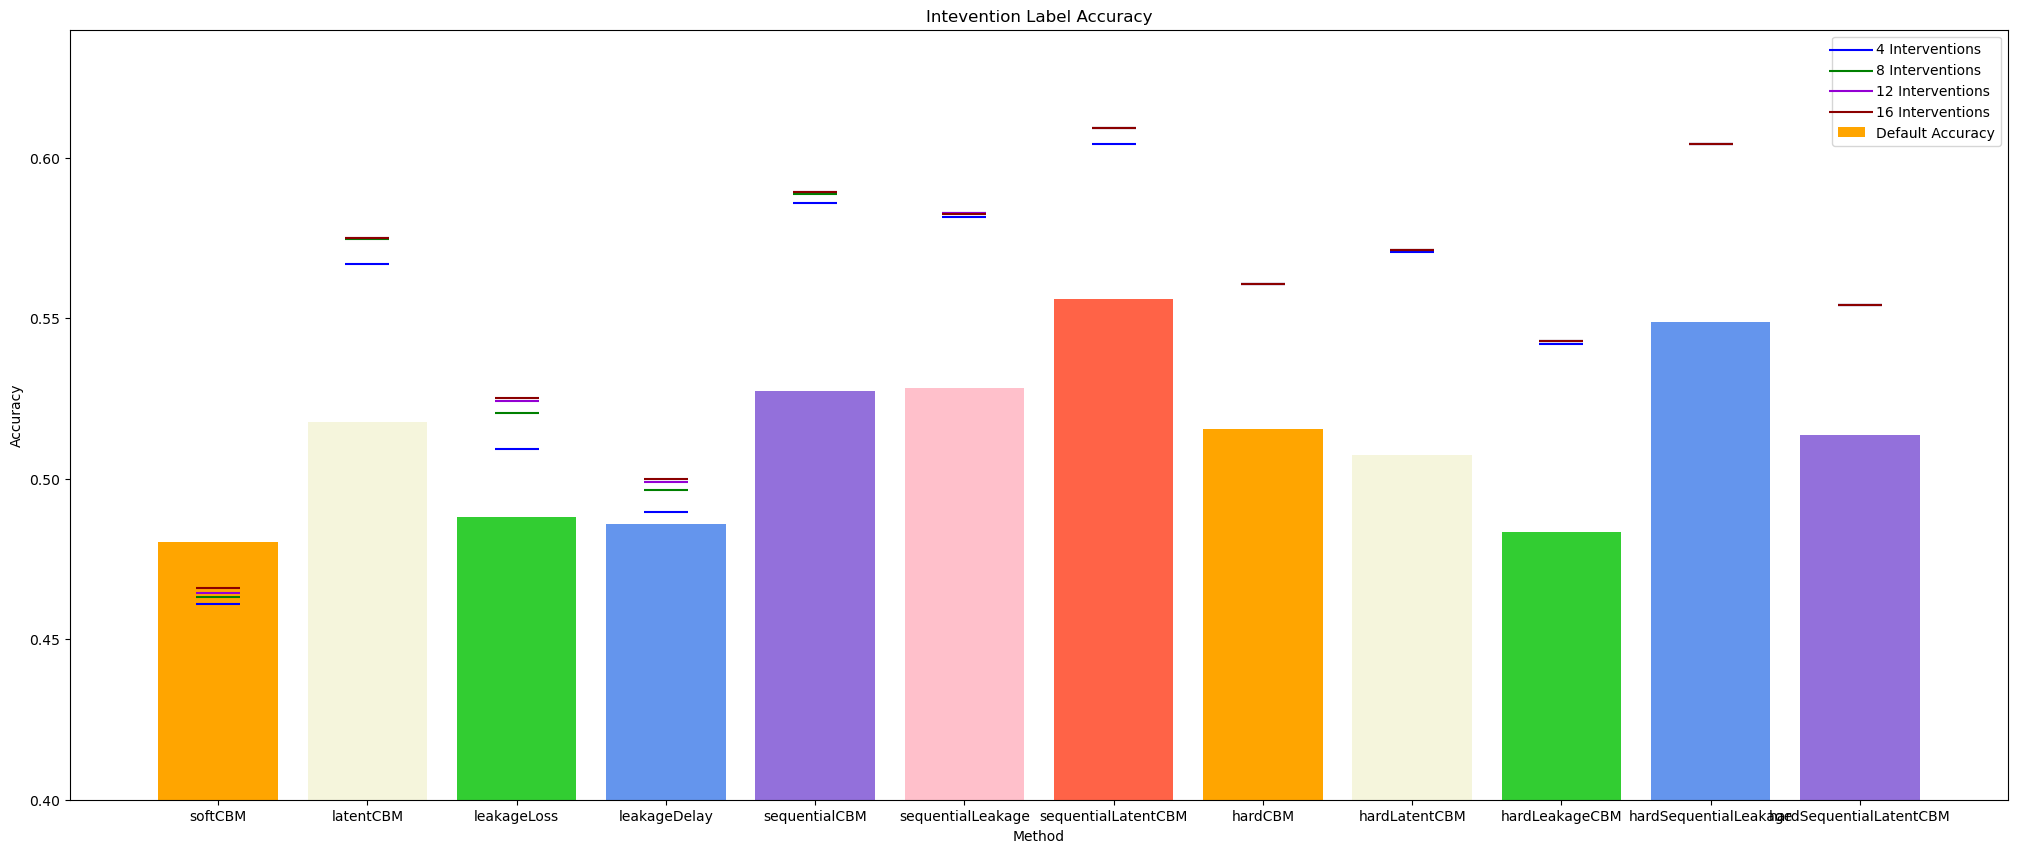

In [59]:
# Set the width of the bars
# Set the positions of the bars on the x-axis
# r1 = np.arange(len(experiments))
# r2 = [x + bar_width for x in r1]

# print(df["Default Accuracy"])
# Create the bar plot
colors = ['orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink', 'tomato']
plt.figure(figsize=(25,10))
plt.bar(experiments, df["Default Accuracy"], color=colors, label='Default Accuracy')
plt.scatter(experiments, df["4 Interventions"], color='blue', label='4 Interventions', marker="_", s=1000)
plt.scatter(experiments, df["8 Interventions"], color='green', label='8 Interventions', marker="_", s=1000)
plt.scatter(experiments, df["12 Interventions"], color='darkviolet', label='12 Interventions', marker="_", s=1000)
plt.scatter(experiments, df["16 Interventions"], color='darkred', label='16 Interventions', marker="_", s=1000)
plt.ylim(bottom=0.4)
# plt.bar(r2, df["4 Interventions"], color='red', width=bar_width, label='Group 2')

# Add labels to the x-axis
plt.xlabel('Method')
# plt.xticks([r + bar_width/2 for r in range(len(headers))], headers)

# Add a y-axis label
plt.ylabel('Accuracy')

# Add a title to the plot
plt.title('Intevention Label Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()